In [1]:
from tsp_annealing import *
import matplotlib.pyplot as plt

TypeError: int() argument must be a string, a bytes-like object or a number, not 'reversed'

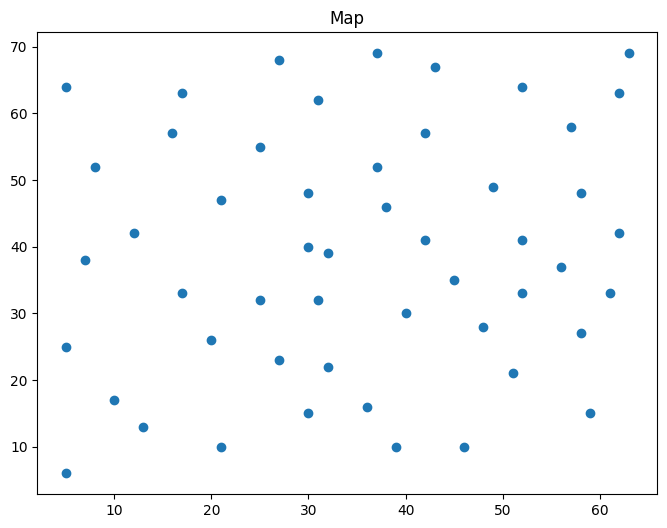

In [2]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')

plt.figure(figsize=(8, 6))
plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
plt.title('Map')

distances = calculate_distances(cities)

best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, altering_method='reverse', max_iterations=int(1E5), alpha=0.9999)

print("Best tour:", best_tour)
print("Best distance:", best_distance)

plot_tour(best_tour, cities)

plt.figure(figsize=(8, 6))
plt.plot(cost_over_iterations)
plt.title('Tour Distance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance')

plt.plot(temperature_over_interations)
plt.title('Temperature Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Temperature')

plt.show()

In [ ]:
cities = load_graph('TSP-Configurations/a280.tsp.txt')

plt.figure(figsize=(8, 6))
plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
plt.title('Map')

distances = calculate_distances(cities)

best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, max_iterations=int(1E5), alpha=0.9999)

print("Best tour:", best_tour)
print("Best distance:", best_distance)

plot_tour(best_tour, cities)

plt.figure(figsize=(8, 6))
plt.plot(cost_over_iterations)
plt.title('Tour Distance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance')


plt.plot(temperature_over_interations)
plt.title('Temperature Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Temperature')

plt.show()

In [ ]:
cities = load_graph('TSP-Configurations/pcb442.tsp.txt')

plt.figure(figsize=(8, 6))
plt.scatter([elem[0] for elem in cities], [elem[1] for elem in cities])
plt.title('Map')

distances = calculate_distances(cities)

best_tour, best_distance, cost_over_iterations, temperature_over_interations = perform_annealing(distances, 'reverse', max_iterations=int(1E5), alpha=0.9999)

print("Best tour:", best_tour)
print("Best distance:", best_distance)

plot_tour(best_tour, cities)

plt.figure(figsize=(8, 6))
plt.plot(cost_over_iterations)
plt.title('Tour Distance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Distance')


plt.plot(temperature_over_interations)
plt.title('Temperature Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Temperature')

plt.show()

In [ ]:
cities = load_graph('TSP-Configurations/eil51.tsp.txt')
distances = calculate_distances(cities)

num_runs = 50
run_simulations(num_runs=num_runs, distances=distances, output='fitness_statistics')

In [ ]:
max_iterations_list = range(100, 20000, 1000)

means, stds, conf_intervals = run_vary_maxiter(num_runs, distances, max_iterations_list)


In [ ]:
means = np.array(means)
lower_bounds = np.array([interval[0] for interval in conf_intervals])
upper_bounds = np.array([interval[1] for interval in conf_intervals])

plt.figure(figsize=(8, 6))
plt.plot(max_iterations_list, means, marker='o', linestyle='-', color='blue', label='Means')
plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.2, color='blue')


plt.title('Means over Number of Max Iterations with Confidence Interval')
plt.xlabel('Max Iterations')
plt.ylabel('Means')
plt.legend()

plt.show()